In [44]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [13]:
with open('data.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    data = pickle.load(f)
    
    
with open('X.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    X = pickle.load(f)
with open('y.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    y = pickle.load(f)

In [40]:
count_vect = TfidfVectorizer()
X_transformed = count_vect.fit_transform(X)
X_transformed = X_transformed.A

In [52]:
clf1 = LogisticRegression(random_state=1)
clf2 = SVC(random_state=1, probability=True)
clf3 = MultinomialNB()

In [47]:
eclf1 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X_transformed, y)
print(eclf1.predict(X_transformed))

[1 1 1 ..., 0 0 0]


In [53]:
eclf2 = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
        voting='soft')
eclf2 = eclf2.fit(X_transformed, y)
print(eclf2.predict(X_transformed))

[1 1 1 ..., 0 1 0]


In [54]:
eclf3 = VotingClassifier(estimators=[
       ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
       voting='soft', weights=[2,1,1])
eclf3 = eclf3.fit(X_transformed, y)
print(eclf3.predict(X_transformed))

[1 1 1 ..., 0 0 0]


In [55]:
# predict class probabilities for all classifiers
probas = [c.fit(X_transformed, y).predict_proba(X_transformed) for c in (clf1, clf2, clf3, eclf2)]

# get class probabilities for the first sample in the dataset
class1_1 = [pr[0, 0] for pr in probas]
class2_1 = [pr[0, 1] for pr in probas]

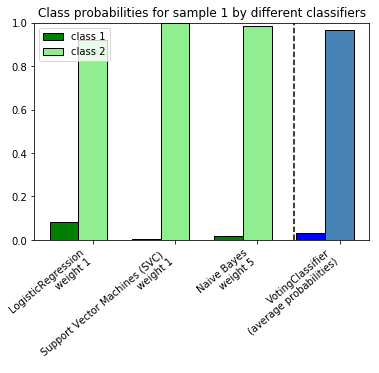

In [57]:
# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([class1_1[:-1], [0]])), width,
            color='green', edgecolor='k')
p2 = ax.bar(ind + width, np.hstack(([class2_1[:-1], [0]])), width,
            color='lightgreen', edgecolor='k')

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, class1_1[-1]], width,
            color='blue', edgecolor='k')
p4 = ax.bar(ind + width, [0, 0, 0, class2_1[-1]], width,
            color='steelblue', edgecolor='k')

# plot annotations
plt.axvline(2.8, color='k', linestyle='dashed')
ax.set_xticks(ind + width)
ax.set_xticklabels(['LogisticRegression\nweight 1',
                    'Support Vector Machines (SVC) \nweight 1',
                    'Naive Bayes\nweight 5',
                    'VotingClassifier\n(average probabilities)'],
                   rotation=40,
                   ha='right')
plt.ylim([0, 1])
plt.title('Class probabilities for sample 1 by different classifiers')
plt.legend([p1[0], p2[0]], ['class 1', 'class 2'], loc='upper left')
plt.show()